In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [4]:
dmart = pd.read_csv('K_class_sales_clean.csv')

In [5]:
dmart.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,Medium,Tier 2,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


In [6]:
dmart.shape

(8523, 13)

In [7]:
dmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Profit                     8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

In [8]:
dmart.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Profit                       0
dtype: int64

In [9]:
dmart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,11.688100,0.066132,140.998838,1997.831867,2181.288914,13.414514
std,5.599483,0.051598,62.258099,8.371760,1706.499616,1.701840
min,0.000000,0.000000,31.300000,1985.000000,33.290000,0.100000
25%,8.050000,0.026989,93.800000,1987.000000,834.247400,13.150000
50%,11.688100,0.053931,142.700000,1999.000000,1794.331000,13.900000
75%,16.000000,0.094585,185.650000,2004.000000,3101.296400,14.300000
max,100.000000,0.328391,266.900000,2009.000000,13086.964800,24.000000


In [10]:
sns.set()

<Figure size 600x600 with 0 Axes>

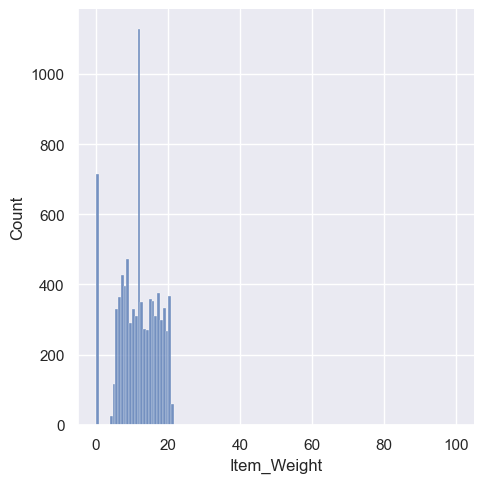

In [11]:
plt.figure(figsize=(6,6))
sns.displot(dmart['Item_Weight'])
plt.show()

<Figure size 600x600 with 0 Axes>

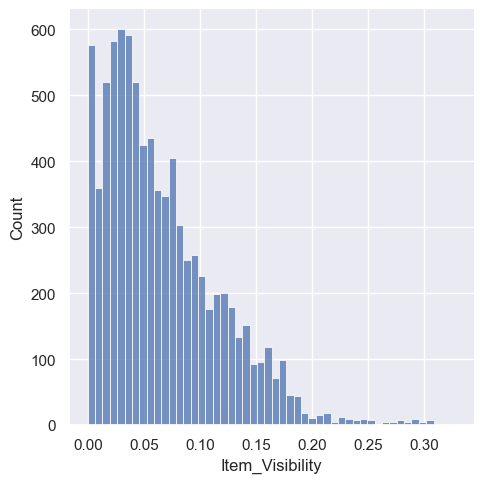

In [12]:
plt.figure(figsize=(6,6))
sns.displot(dmart['Item_Visibility'])
plt.show()

<Figure size 600x600 with 0 Axes>

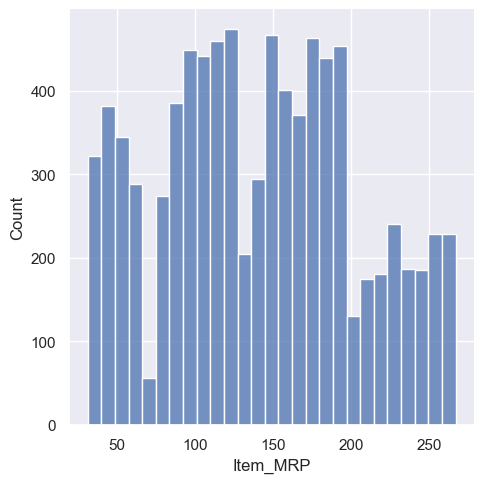

In [13]:
plt.figure(figsize=(6,6))
sns.displot(dmart['Item_MRP'])
plt.show()

<Figure size 600x600 with 0 Axes>

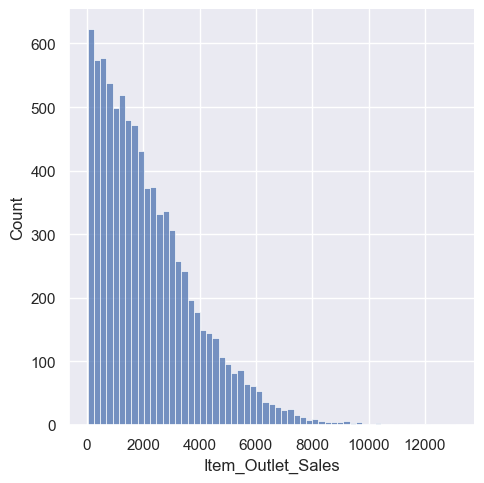

In [14]:
plt.figure(figsize=(6,6))
sns.displot(dmart['Item_Outlet_Sales'])
plt.show()

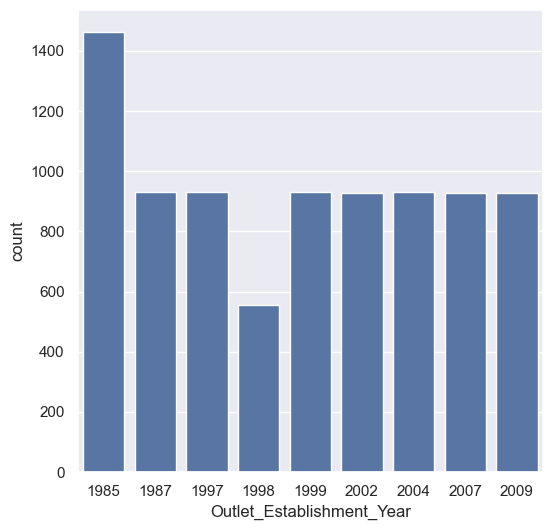

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=dmart)
plt.show()


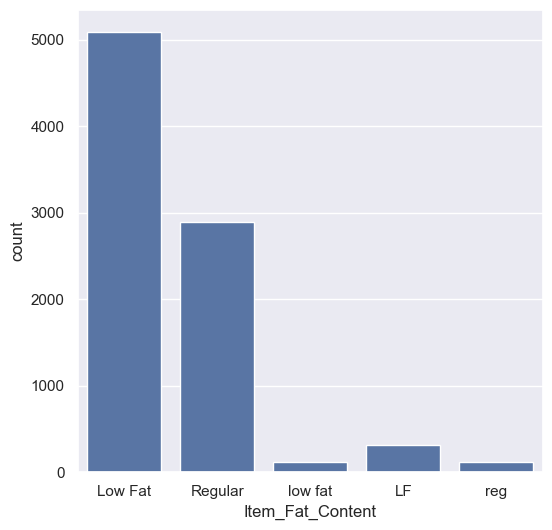

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=dmart)
plt.show()


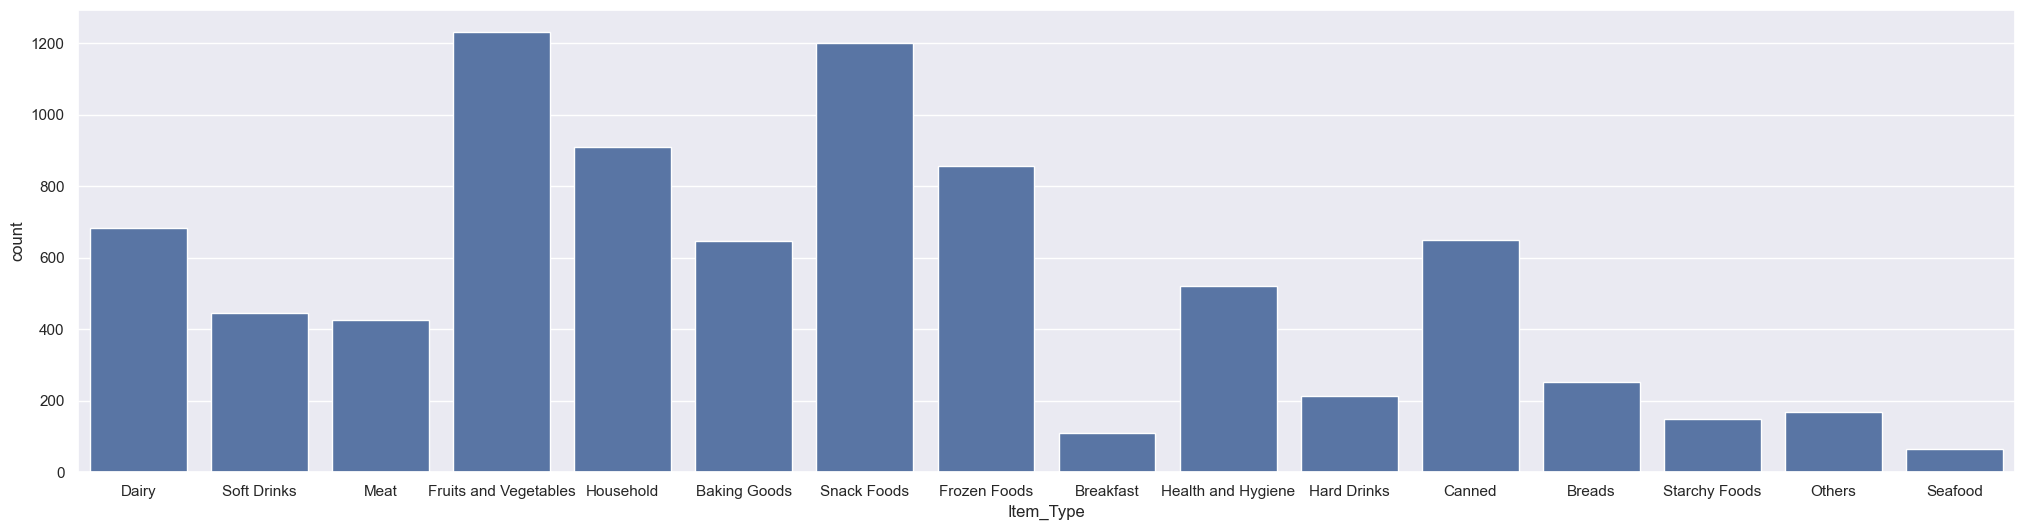

In [21]:
plt.figure(figsize=(25,6))
sns.countplot(x='Item_Type',data=dmart)
plt.show()


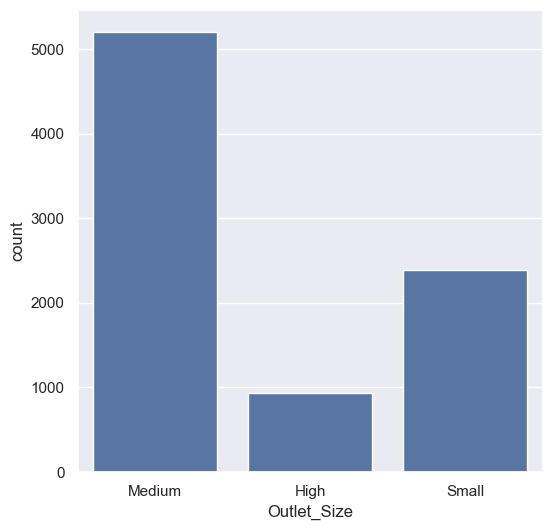

In [23]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size',data=dmart)
plt.show()


In [25]:
dmart['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [32]:
# Assuming dmart is your DataFrame
dmart['Item_Fat_Content'] = dmart['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})


In [33]:
dmart['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [34]:
#label Encoder
encoder = LabelEncoder()


In [35]:
dmart['Item_Identifier'] = encoder.fit_transform(dmart['Item_Identifier'])

dmart['Item_Fat_Content'] = encoder.fit_transform(dmart['Item_Fat_Content'])

dmart['Item_Type'] = encoder.fit_transform(dmart['Item_Type'])

dmart['Outlet_Identifier'] = encoder.fit_transform(dmart['Outlet_Identifier'])

dmart['Outlet_Size'] = encoder.fit_transform(dmart['Outlet_Size'])

dmart['Outlet_Location_Type'] = encoder.fit_transform(dmart['Outlet_Location_Type'])

dmart['Outlet_Type'] = encoder.fit_transform(dmart['Outlet_Type'])

In [36]:
dmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,156,9.30,0,0.016047,4,249.8,9,1999,1,0,1,3735.1380,11.5
1,8,5.92,1,0.019278,14,48.3,3,2009,1,0,2,443.4228,14.3
2,662,17.50,0,0.016760,10,141.6,9,1999,1,0,1,2097.2700,14.5
3,1121,19.20,1,0.000000,6,182.1,0,1998,1,0,0,732.3800,13.6
4,1297,8.93,0,0.000000,9,53.9,1,1987,0,1,1,994.7052,14.1


In [37]:
x = dmart.drop(columns='Item_Outlet_Sales',axis=1)
y = dmart['Item_Outlet_Sales']

In [38]:
print(x)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4     249.8                  9    

In [39]:
print(y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [44]:
print(x.shape, x_train.shape, x_test.shape)

(8523, 12) (6818, 12) (1705, 12)


In [45]:
regressor = XGBRegressor()

In [47]:
regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [50]:
training_data_prediction = regressor.predict(x_train)

In [53]:
r2_train = metrics.r2_score(y_train, training_data_prediction)

In [55]:
r2_train

0.8931897446537519

In [56]:
test_data_prediction = regressor.predict(x_test)

In [57]:
r2_test = metrics.r2_score(y_test, test_data_prediction)

In [58]:
r2_test

0.5091367217020564

In [59]:
print("R-squared score on training data:", r2_train)
print("R-squared score on test data:", r2_test)

R-squared score on training data: 0.8931897446537519
R-squared score on test data: 0.5091367217020564


In [1]:
pip install pipreqs


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/798.3 kB ? eta -:--:--
   --------------------------- ----------- 563.2/798.3 kB 11.8 MB/s eta 0:00:01
   --------------------------------------- 798.3/798.3 kB 10.1 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13773 sha256=83e054dbb0c795b6df6fb4a659df2d12572001b24ad0c2cc588f37f5a4416390
  Stored in directory: c:\users\manish\appdata\local\pip\cache\wheels\1a\bf\a1\4cee4f7678c68c5875ca89eaccf460593539805c3906722228
Successfully built docopt
  Attempting uninstall:

In [4]:
!pipreqs .


INFO: Not scanning for jupyter notebooks.
INFO: Successfully saved requirements file in .\requirements.txt
